In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout,Input
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


In [7]:
file_path = r'C:\Users\charan\OneDrive\Desktop\waterQuality1.csv'

# Load data into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

   aluminium ammonia  arsenic  barium  cadmium  chloramine  chromium  copper  \
0       1.65    9.08     0.04    2.85    0.007        0.35      0.83    0.17   
1       2.32   21.16     0.01    3.31    0.002        5.28      0.68    0.66   
2       1.01   14.02     0.04    0.58    0.008        4.24      0.53    0.02   
3       1.36   11.33     0.04    2.96    0.001        7.23      0.03    1.66   
4       0.92   24.33     0.03    0.20    0.006        2.67      0.69    0.57   

   flouride  bacteria  ...   lead  nitrates  nitrites  mercury  perchlorate  \
0      0.05      0.20  ...  0.054     16.08      1.13    0.007        37.75   
1      0.90      0.65  ...  0.100      2.01      1.93    0.003        32.26   
2      0.99      0.05  ...  0.078     14.16      1.11    0.006        50.28   
3      1.08      0.71  ...  0.016      1.41      1.29    0.004         9.12   
4      0.61      0.13  ...  0.117      6.74      1.11    0.003        16.90   

   radium  selenium  silver  uranium  is_saf

In [10]:
import pandas as pd

# Load data into a DataFrame
file_path = r'C:\Users\charan\OneDrive\Desktop\waterQuality1.csv'
df = pd.read_csv(file_path)

# Replace '#NUM!' with NaN in the target variable
df.loc[df['is_safe'] == '#NUM!', 'is_safe'] = np.nan

# Drop rows where the target variable has NaN values
df.dropna(subset=['is_safe'], inplace=True)

# Convert 'is_safe' column to numeric
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce')

# Fill NaN values resulting from non-numeric conversions with 0
df['is_safe'] = df['is_safe'].fillna(0)

# Define the threshold
threshold = 0.5

# Convert values based on the threshold
df['is_safe'] = (df['is_safe'] > threshold).astype(int)

# Display the updated value counts of the target variable
print(df['is_safe'].value_counts())


is_safe
0    7084
1     912
Name: count, dtype: int64


In [11]:
from sklearn.preprocessing import StandardScaler
df.replace('#NUM!', np.nan, inplace=True)

# Convert all columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')

# Handle missing values by imputing them using mean
df.fillna(df.mean(), inplace=True)

# Apply StandardScaler to normalize the features
X = df.drop(columns=['is_safe'])  # Assuming 'is_safe' is the target column
y = df['is_safe']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
print(pd.DataFrame(X_scaled, columns=X.columns).head())


   aluminium   ammonia   arsenic    barium   cadmium  chloramine  chromium  \
0   0.777403 -0.585491 -0.480875  1.054205 -0.993241   -0.711941  2.152993   
1   1.306945  0.775118 -0.599632  1.432447 -1.131948    1.208552  1.598765   
2   0.271572 -0.029083 -0.480875 -0.812340 -0.965499    0.803417  1.044536   
3   0.548198 -0.332067 -0.480875  1.144654 -1.159690    1.968179 -0.802892   
4   0.200439  1.132165 -0.520460 -1.124801 -1.020982    0.191820  1.635713   

     copper  flouride  bacteria   viruses      lead  nitrates  nitrites  \
0 -0.973050 -1.657446 -0.363345 -0.869387 -0.781070  1.129767 -0.348629   
1 -0.223303  0.294799  1.002460  0.849782  0.009785 -1.409197  1.046960   
2 -1.202564  0.501507 -0.818614 -0.861452 -0.368450  0.783298 -0.383518   
3  1.306793  0.708215  1.184567  1.008475 -1.434385 -1.517469 -0.069511   
4 -0.361012 -0.371261 -0.575804 -0.866742  0.302058 -0.555658 -0.383518   

    mercury  perchlorate    radium  selenium    silver   uranium  
0  0.609178  

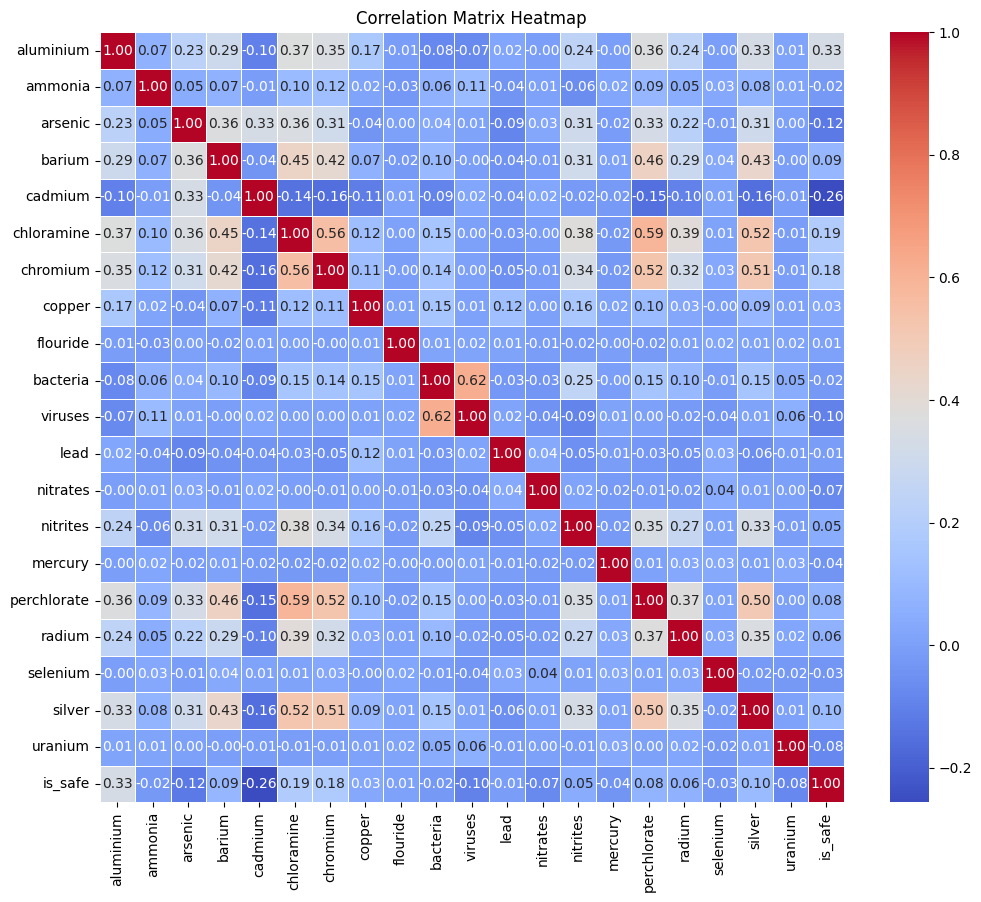

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Define subsets of features
feature_subsets = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
                   'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
                   'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium',
                   'selenium', 'silver', 'uranium', 'is_safe']

# Drop rows with missing values
cleaned_df = df.dropna(subset=feature_subsets).copy()

# Encode 'is_safe' column into numeric values
label_encoder = LabelEncoder()
cleaned_df['is_safe'] = label_encoder.fit_transform(cleaned_df['is_safe'])

# Calculate the correlation matrix
corr_matrix = cleaned_df[feature_subsets].corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


In [13]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Print the shapes of the training and validation sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (6396, 20)
Shape of X_val: (1600, 20)
Shape of y_train: (6396,)
Shape of y_val: (1600,)


In [14]:
import tensorflow as tf

# Reshape the input data to have three dimensions
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_reshaped = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)

# Define the LSTM model architecture
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(units=128, return_sequences=True, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(units=64),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Print the model summary
print(model.summary())


C:\Users\charan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,081 (461.25 KB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
# Compile the model with appropriate optimizer, loss function, and metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Model compiled successfully.")

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
print("Early stopping callback defined.")



Model compiled successfully.
Early stopping callback defined.


In [16]:
# Train the model with early stopping
history = model.fit(X_train.reshape(X_train.shape[0], X_train.shape[1], 1), y_train, epochs=30, batch_size=64, 
                    validation_data=(X_val.reshape(X_val.shape[0], X_val.shape[1], 1), y_val), 
                    callbacks=[early_stopping], verbose=1)
print("Model training completed.")




Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8701 - loss: 0.4460 - val_accuracy: 0.8750 - val_loss: 0.3605
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8895 - loss: 0.3254 - val_accuracy: 0.8731 - val_loss: 0.3773
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.8870 - loss: 0.3168 - val_accuracy: 0.8794 - val_loss: 0.3422
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 57ms/step - accuracy: 0.8961 - loss: 0.3014 - val_accuracy: 0.8788 - val_loss: 0.3572
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.9001 - loss: 0.2967 - val_accuracy: 0.8769 - val_loss: 0.3207
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.8975 - loss: 0.2957 - val_accuracy: 0.8881 - val_loss: 0.3209
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.9126 - loss: 0.2705 - val_accuracy: 0.8794 - val_loss: 0.3141
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.9048 - loss: 0.2666 - val_accu

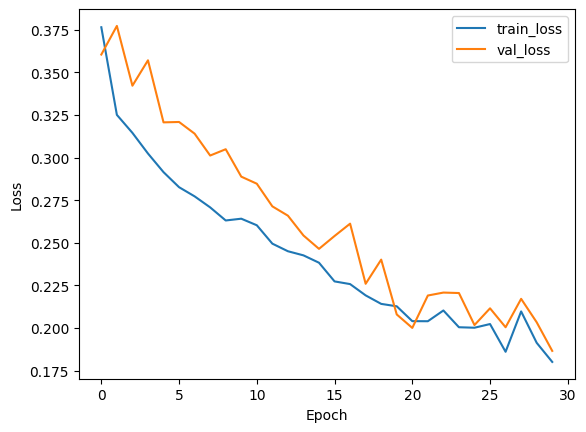

In [17]:
# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


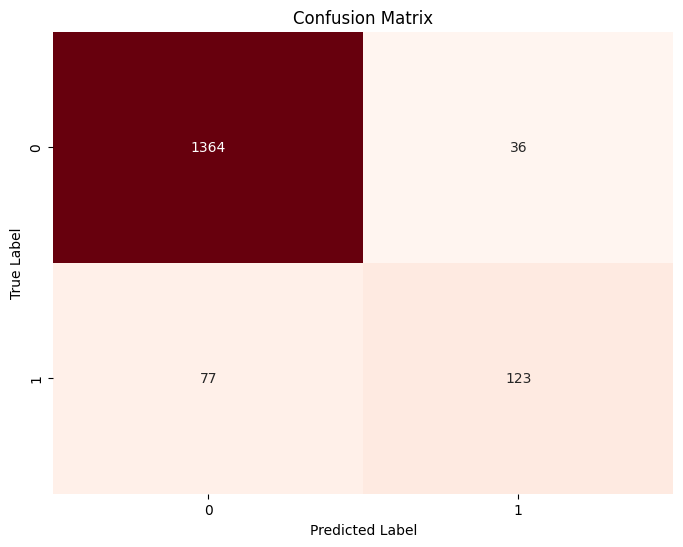


Accuracy: 0.929375

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1400
           1       0.77      0.61      0.69       200

    accuracy                           0.93      1600
   macro avg       0.86      0.79      0.82      1600
weighted avg       0.92      0.93      0.93      1600



In [18]:
# Calculate predicted probabilities
y_prob = model.predict(X_val_reshaped)

# Convert probabilities to class labels
y_pred = (y_prob > 0.5).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_val, y_pred)

# Calculate classification report
class_report = classification_report(y_val, y_pred)

# Print confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print accuracy and classification report
print("\nAccuracy:", accuracy)
print("\nClassification Report:")
print(class_report)


In [71]:
import numpy as np
import pandas as pd

# Take random values from the dataset for prediction
random_indices = np.random.choice(len(X_val_reshaped), 10)  # Adjust the number of samples as needed
X_random = X_val_reshaped[random_indices]
serial_numbers = np.arange(len(X_val_reshaped))[random_indices]  # Generating serial numbers assuming the index as serial numbers

# Predict water quality using the trained LSTM model
y_random_prob = model.predict(X_random)

# Convert probabilities to class labels
y_random_pred = (y_random_prob > 0.3).astype(int)

# Interpret predictions
interpretation = ['Potable (Safe for Drinking)' if pred == 1 else 'Not Potable (Not Safe for Drinking)' for pred in y_random_pred]

# Display predictions
predictions_df = pd.DataFrame({'Serial Number': serial_numbers, 'Predicted Potability': y_random_pred.flatten(), 'Predicted Drinking Water': interpretation})
print("Predictions using LSTM Model:")
print(predictions_df)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Predictions using LSTM Model:
   Serial Number  Predicted Potability             Predicted Drinking Water
0            383                     0  Not Potable (Not Safe for Drinking)
1            669                     1          Potable (Safe for Drinking)
2            584                     0  Not Potable (Not Safe for Drinking)
3           1422                     0  Not Potable (Not Safe for Drinking)
4            631                     1          Potable (Safe for Drinking)
5            953                     1          Potable (Safe for Drinking)
6           1127                     0  Not Potable (Not Safe for Drinking)
7            600                     0  Not Potable (Not Safe for Drinking)
8           1238                     0  Not Potable (Not Safe for Drinking)
9            134                     0  Not Potable (Not Safe for Drinking)
